# GCC's ssc-cdi : Restoration Interface for Cateretê, v0.0.5
 
- #### To visualize outputs in real time, open the log console at: View > Show Log Console
- #### The processed data will be saved in the corresponding folder at .../proc/recons/...
- #### Questions? E-mail gcc@lnls.br

In [1]:
install_packages = False

%matplotlib widget
import matplotlib.pyplot as plt
import sscInstall, os
from sscCdi import restoration_jupyter
if install_packages:
    server = sscInstall.connect_server()
    print("The kernel will restart after installation. Please run the cell again using install_packages = False")
    sscInstall.install_jupyter(server,beamline='caterete',sscCdi='0.4.9',sscPtycho='1.0.2',sscPimega='0.5.3',sscRaft='2.0.1',sscRadon='1.0.0',sscResolution='1.2.3')
    os._exit(00) # shutdown kernel. Required to import new installed packages

## Inputs

In [2]:
n_of_threads = 32 # use 32 as standard value; should be fast enough

distance = 20 # meters

data_path        = "/ibira/lnls/beamlines/caterete/proposals/20220752/data/pwcdi/directbeam_b_002.hdf5"
empty_path       = ""
flat_path        = ""
mask_path        = ""
subtraction_path = ""

apply_binning = False
fill_blanks = True
apply_crop = [True, 50, 1404,1400] # if [T/F, size, center_y, center_x]. if size == 0 then the maximum possible size will be used


save_path = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/restoration/" # path to output processed data

## Process Data
IMPORTANT: In the function call bellow, use empty string for paths for which you don't want to apply that specific masking element (i.e. path='')

In [3]:
processed_data, restored_full_DP = restoration_jupyter.restoration_via_interface(data_path,[n_of_threads, distance, apply_binning, apply_crop, fill_blanks,3],flat_path,empty_path,mask_path,subtraction_path, save_path)

Corrected center position: cy=1398 cx=1397


sh: 1: h5clear: not found
2023-02-14 13:42:47,772 - sscIO.io - INFO - -- Calling MPI code to read /ibira/lnls/beamlines/caterete/proposals/20220752/data/pwcdi/directbeam_b_002.hdf5 with 32 processes


Reading file metadata
Output Shape (1, 3072, 3072) int32
(1, 1, 3072, 3072) int32 pimega None (0, 0) (0, 3071) (0, 3071)
Creating shared array
Reading volume with MPI!


2023-02-14 13:42:50,231 - sscIO.io - INFO - -- MPI command result: CompletedProcess(args=['mpirun', '--use-hwthread-cpus', '-n', '32', 'python3', '-c', "from sscIO import io_mpi; io_mpi.read_volume_MPI_worker(**{'filepath': '/ibira/lnls/beamlines/caterete/proposals/20220752/data/pwcdi/directbeam_b_002.hdf5', 'output_type': 'shared_array', 'shm_key': '78b95fa8-c5e1-42b8-ad17-eaa4efb98e10'})"], returncode=0)


0.12996339797973633 s
290.5MB/s
	Raw data shape:  (1, 3072, 3072)
Correcting and restoring diffraction patterns... 
ssc-pimega: creating 1x100x100 shared array (SharedArray)
ssc-pimega: 1 Images corrected within 3.104534149169922 sec
               Shared Array creation 0.0006465911865234375 sec
	Restored data shape:  (1, 100, 100)
Saving data at:  /ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/restoration/
Done!
Output data shape (1, 100, 100). Type: int32
Dataset size: 0.04 MBs = 0.00 GBs


## Find center: 
    - Plot with average of data to find the center of the DP. Re-run "Process Data" after this is done!

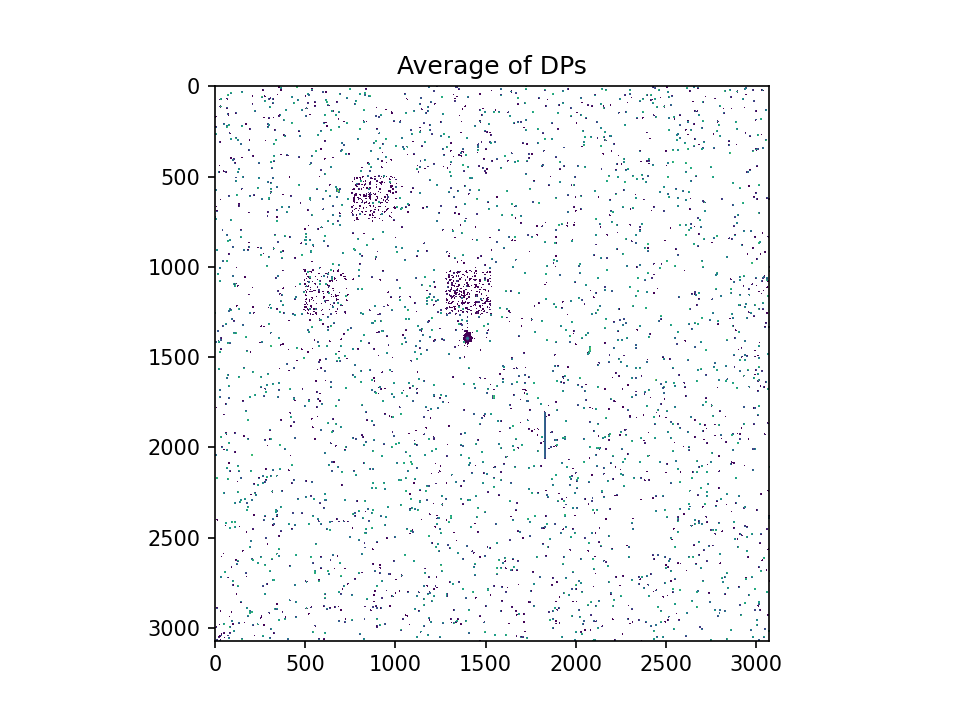

In [4]:
restoration_jupyter.plot_flipped_full_DP(restored_full_DP)

## View processed data
    - Plot containing the processed data. Use slider to scan through slices and visualize each diffraction pattern
    - ATTENTION: since "processed_data" may have up to GBs of size, plots can take a long time to load (up to a few minutes) 
    If you want to have a quick preview of the data only, select a small portion of the data using a slice, for instance, by changing "processed_data" to "processed_data[25:50]" to preview only slices 25 to 50

In [5]:
data_slice = processed_data
restoration_jupyter.plot_DPs_with_slider(data_slice)